# Final capstone project

In this project I'll use K-Nearests Neighbors to find which neighborhood in manhattan are most alike another one in Toronto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data I'm using was already gattered from the other projects, so I saved them in two csv files and I'm retrieving them here

In [6]:
man_df=pd.read_csv("manhattan_venues.csv", index_col=0)
tor_df=pd.read_csv("toronto_venues.csv", index_col=0)

First, I'll do some analysis to see how close are the two set of neighborhoods when wee look to recommended places

In [59]:
man_counts=man_df['Venue Category'].value_counts(normalize=False)
tor_counts=tor_df['Venue Category'].value_counts(normalize=False)

In [63]:
print('Unique venues in manhattan: ', man_counts.shape[0], 'Unique Venues in Toronto: ', tor_counts.shape[0])

Unique venues in manhattan:  343 Unique Venues in Toronto:  213


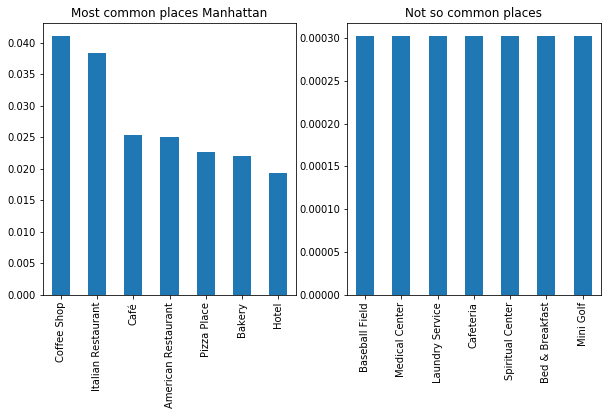

In [249]:
fig, ax0=plt.subplots(1,2, figsize=(10,5))


man_counts.iloc[0:7].plot(kind='bar', ax=ax0[0])
man_counts.iloc[-8:-1].plot(kind='bar', ax=ax0[1])

ax0[0].set_title('Most common places Manhattan')
ax0[1].set_title('Not so common places')

plt.savefig('Common_manhattan.png')

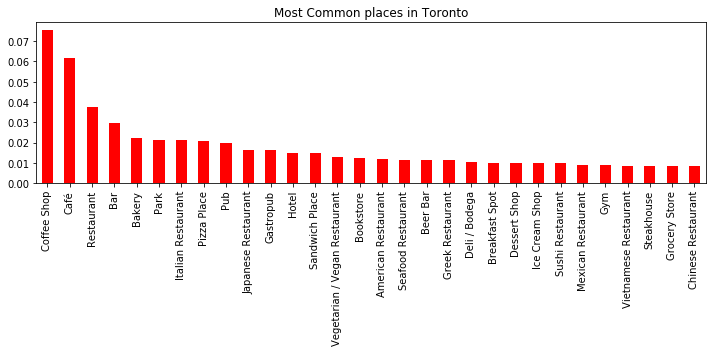

In [274]:
tor_counts.iloc[0:30].plot(kind='bar', figsize=(10,5), color='red')
plt.title('Most Common places in Toronto')
plt.tight_layout()
plt.savefig('common_toronto.png')

Let's do a dot plot to see if there is some kind of correlation between the number of places

In [245]:
#This time we're going to normalize the data
man_counts=man_df['Venue Category'].value_counts(normalize=True)
tor_counts=tor_df['Venue Category'].value_counts(normalize=True)

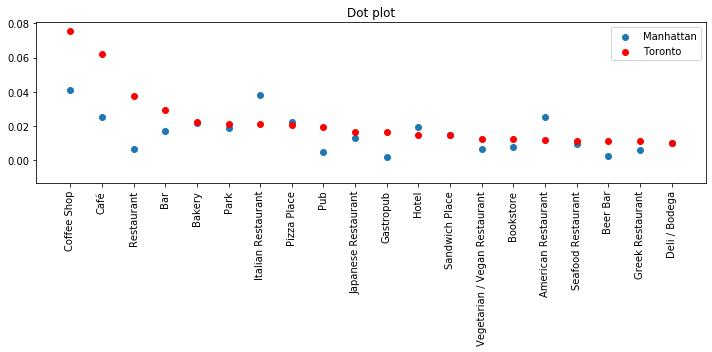

In [276]:
N=20
plt.figure(figsize=(10,5))
plt.scatter(range(0,N), man_counts[tor_counts.index[0:N]])
plt.scatter(range(0,N), tor_counts.iloc[0:N], color='red')
plt.xticks(range(0,N),tor_counts.index[0:N], rotation=90)
plt.title('Dot plot')
plt.legend(['Manhattan', 'Toronto'])
plt.tight_layout()

plt.savefig('dotted_toronto.png')

The graph indicates a good intra class correlation

#### Let's see how many kind of Venues there are in Manhattan and Toronto both

In [68]:
man_set=set(man_counts.index.to_list())
tor_set=set(tor_counts.index.to_list())

In [70]:
len(man_set & tor_set)

175

The amount of places that are either in Toronto or Manhattan

In [80]:
sd_set=man_set.symmetric_difference(tor_set)
len(sd_set)

206

It does not make much sense using data that we know there is in one city bot not in the other, so we neede to see how many samples will we loseif we discard these

In [79]:
tor_counts[tor_set-man_set].sum()+man_counts[man_set-tor_set].sum()

660

We would lose 660 samples. That's something. Let's see the excusive set

In [86]:
man_counts[man_set-tor_set].sort_values()

Cambodian Restaurant         1
Stables                      1
Gymnastics Gym               1
Other Great Outdoors         1
Community Center             1
                            ..
Hotel Bar                   13
Spanish Restaurant          16
Women's Store               18
Cycle Studio                20
Mediterranean Restaurant    30
Name: Venue Category, Length: 168, dtype: int64

## Using KNN

Now I'm going to prepare the data to use KNN for clustering. We must transform the categorical variables in dummie ones in order to use the KNN algorithm. We also must remove the places that there are not commom to both cities. 

In [134]:
tor_df_drop=tor_df.copy()
man_df_drop=man_df.copy()
for item in sd_set:
    tor_df_drop.drop(tor_df_drop[tor_df_drop['Venue Category']==item].index, inplace=True)
    man_df_drop.drop(man_df_drop[man_df_drop['Venue Category']==item].index, inplace=True)

In [140]:
tor_onehot=pd.get_dummies(tor_df_drop[['Venue Category']], prefix="", prefix_sep="")
tor_onehot['Neighborhood']=tor_df_drop['Neighborhood']

man_onehot=pd.get_dummies(man_df_drop[['Venue Category']], prefix="", prefix_sep="")
man_onehot['Neighborhood']=man_df_drop['Neighborhood']

In [141]:
man_onehot.shape

(2832, 176)

In [215]:
tor_onehot.shape

(2016, 176)

Both dataframes have the same number of columns, that's important

Now we are going to group the data and take the means with respect to the Neighborhoods

In [142]:
tor_ready=tor_onehot.groupby('Neighborhood').mean()
man_ready=man_onehot.groupby('Neighborhood').mean()

In [216]:
man_ready.head()

,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Battery Park City,0.012658,0.0,0.000000,0.000000,0.0,0.000000,0.012658,0.025316,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.037975,0.0,0.000000
Carnegie Hill,0.011111,0.0,0.000000,0.011111,0.0,0.000000,0.000000,0.000000,0.0,0.011111,...,0.0,0.0,0.0,0.011111,0.0,0.022222,0.011111,0.033333,0.0,0.033333
Central Harlem,0.058824,0.0,0.029412,0.000000,0.0,0.000000,0.000000,0.029412,0.0,0.029412,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
Chelsea,0.034483,0.0,0.022989,0.000000,0.0,0.011494,0.000000,0.000000,0.0,0.011494,...,0.0,0.0,0.0,0.011494,0.0,0.000000,0.000000,0.034483,0.0,0.000000
Chinatown,0.047059,0.0,0.000000,0.000000,0.0,0.023529,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.011765,0.0,0.047059,0.000000,0.000000,0.0,0.011765


## Training 

To train the KNN classifier we just need to pass the dataframe with the manhattan means, they will act like dimensions, and the labels will simply be the neighborhoods names

In [163]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(man_ready.values, man_ready.index.to_list())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [158]:
tor_ready.shape

(73, 175)

In [217]:
man_ready.shape

(40, 175)

To predict the toronto labels we just need to pass the toronto dataframe and we will get the manhattan labels

In [167]:
predict=neigh.predict(tor_ready.values)

In [168]:
predict_df=pd.DataFrame({'Toronto N': tor_ready.index.to_list(), 'Manhattan Fit': predict})
predict_df

,Toronto N,Manhattan Fit
0,Adelaide,Upper West Side
1,Bathurst Quay,Stuyvesant Town
2,Berczy Par,Chelsea
3,Brockton,Chelsea
4,CN Tower,Stuyvesant Town
...,...,...
68,Underground cit,Upper West Side
69,Union Station,Financial District
70,University of Toronto,Upper West Side
71,Victoria Hote,Murray Hill


## Checking if it makes any sense

In [170]:
predict_df['Manhattan Fit'].value_counts()

Upper West Side       12
Stuyvesant Town        8
Chelsea                8
Murray Hill            7
Battery Park City      5
East Village           5
Carnegie Hill          5
Financial District     4
Hamilton Heights       3
Washington Heights     3
Manhattan Valley       2
Gramercy               2
Lenox Hill             2
Tudor City             2
Yorkville              1
Roosevelt Island       1
Soho                   1
Midtown                1
Little Italy           1
Name: Manhattan Fit, dtype: int64

In [271]:
tor_df.groupby('Neighborhood').count().sort_values('Venue')

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Summerhill Eas,1,1,1,1,1,1
Moore Park,1,1,1,1,1,1
Roselaw,1,1,1,1,1,1
The Danforth Eas,3,3,3,3,3,3
Lawrence Par,3,3,3,3,3,3
...,...,...,...,...,...,...
Kensington Market,50,50,50,50,50,50
Kin,50,50,50,50,50,50
Victoria Hote,50,50,50,50,50,50


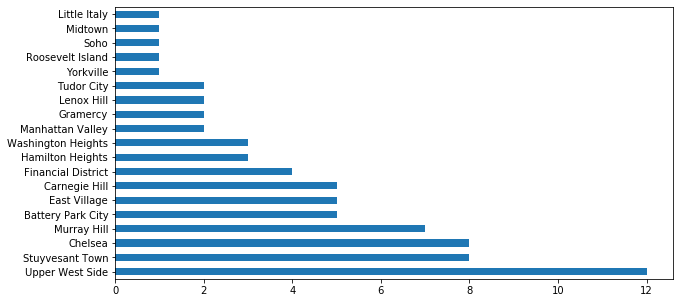

In [261]:
predict_df['Manhattan Fit'].value_counts().plot(kind='barh', figsize=(10,5))
plt.savefig('barh.png')

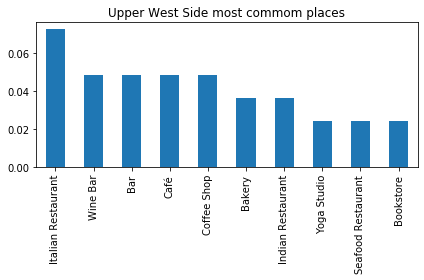

In [277]:
tor_neigh='Adelaide'
man_neigh='Upper West Side'
man_ready.loc[man_neigh].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title(man_neigh+' most commom places')
plt.tight_layout()

plt.savefig(man_neigh+'.png')

Text(0.5, 1.0, 'Adelaide most commom places')

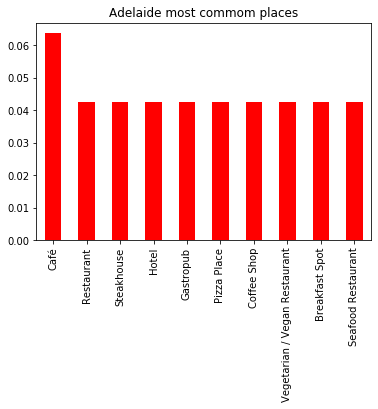

In [255]:
tor_ready.loc[tor_neigh].sort_values(ascending=False)[0:10].plot(kind='bar', color='red')
plt.title(tor_neigh + ' most commom places')

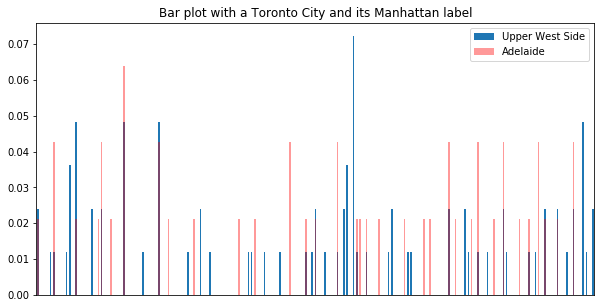

In [273]:
ax0=man_ready.loc[man_neigh].plot(kind='bar', figsize=(10,5), xticks=None)
tor_ready.loc[tor_neigh].plot(kind='bar', color='red', xticks=None, ax=ax0, alpha=0.4)

ax0.set_xticks([])
plt.legend()
plt.title('Bar plot with a Toronto City and its Manhattan label')

plt.savefig('comparassion_plot.png')